# Soft Computing

## Cvičení 3 - Podpůrné vektory (Support Vector Machines)

**K čemu se využívá?**

Metoda učení s učitelem, která se využívá pro klasifikaci (zejména) a regresi. 
* [machinelearningmastery.com](https://machinelearningmastery.com/method-of-lagrange-multipliers-the-theory-behind-support-vector-machines-part-3-implementing-an-svm-from-scratch-in-python/)
* [towardsdatascience.com](https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8)
* [analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

**Jak funguje?**

Separování dat do tříd pomocí n-dimenzionálního Euklidovského prostoru (hyperplane), kde n = počet vlastností - 1. Separující hyperprostor je tvořen s využitím bodu poblíž rozhraní, tzv. podpůrných vektorů. Důležitým termínem je odsazení (margin), který říká, jak moc daleko jsou rozhraní hyperprostoru od podpůrných vektorů.

**Důležité termíny**

* Hyperprostor (hyperplane) = N-dimenzionální Euklidovský prostor, který rozděluje body do tříd
* Podpůrné vektory (support vectors) = pomocné body nejblíže rozhraní hyperprostoru, pomáhající separaci
* Odsazení (margin) = vzdálenost rozhraní hyperprostoru od podpůrného vektoru; čím větší, tím lepší separace
* Jádro (kernel) = transformační funkce, který mapuje low-dim data na high-dim data, která lze lépe separovat

<img src="SOC3_soubory/svm.png" style="height:250px">

**Jádrový trik (kernel trick)**

Metoda, která umožňuje lineárně neseparovatelná data lineárně separovat převedením do prostoru s větším počtem dimenzí.

<img src="SOC3_soubory/kerneltrick.png" style="height:200px">

<img src="SOC3_soubory/kernels.jpg" style="height:300px">

### Zápisky

In [ ]:
!python3 -m pip install numpy

In [ ]:
!python3 -m pip install matplotlib

In [ ]:
!python3 -m pip install sklearn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

#### 3.1 Lineární jádro (kernel)

nahrání dat a cílových kategorií

In [7]:
iris = datasets.load_iris()
x = iris.data[:, :2] #vezmem pouze 2 features
y = iris.target

vytvoření klasifikátoru pro SVM a fitování dat

In [9]:
C = 1.0 #regularizační parametr
svc = svm.SVC(kernel="linear", C=C).fit(x,y)

vytvoření mřížky pro vizualizaci

In [10]:
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
step = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

vykreslení dat

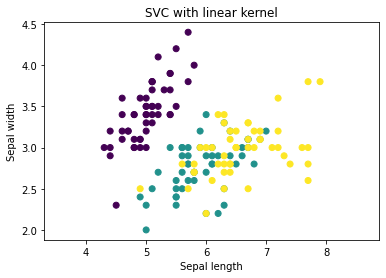

In [14]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

vykreslení klasifikace

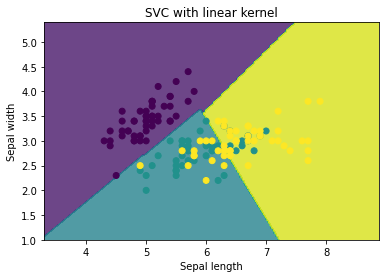

In [15]:
plt.subplot(1, 1, 1)
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

#### 3.2 Hyper-parametry SVM

klasifikace pomocí nelineárního jádra

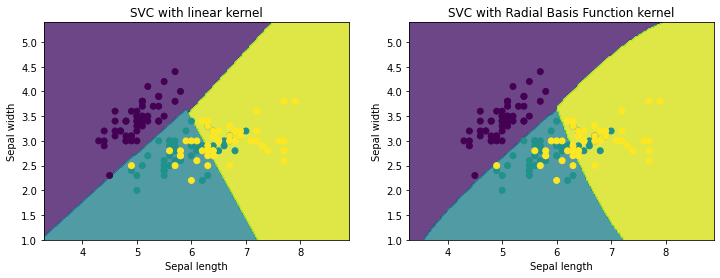

In [21]:
svc_linear = svm.SVC(kernel='linear', C=1).fit(x, y)
svc_rbf = svm.SVC(kernel='rbf', C=1).fit(x, y)

plt.rcParams["figure.figsize"] = (12,4)

plt.subplot(1, 2, 1)
z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

plt.subplot(1, 2, 2)
z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Radial Basis Function kernel')

plt.show()

vliv parametru gama na klasifikaci

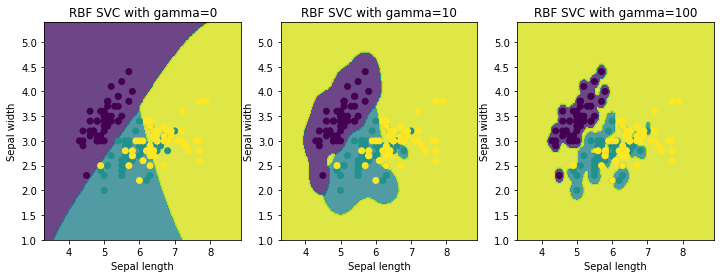

In [22]:
svc_gamma0 = svm.SVC(kernel='rbf', C=1).fit(x, y)
svc_gamma10 = svm.SVC(kernel='rbf', C=1, gamma=10).fit(x, y)
svc_gamma100 = svm.SVC(kernel='rbf', C=1, gamma=100).fit(x, y)

plt.rcParams["figure.figsize"] = (12,4)

plt.subplot(1, 3, 1)
z = svc_gamma0.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('RBF SVC with gamma=0')

plt.subplot(1, 3, 2)
z = svc_gamma10.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('RBF SVC with gamma=10')

plt.subplot(1, 3, 3)
z = svc_gamma100.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('RBF SVC with gamma=100')

plt.show()

vliv penalty parametru C (trade-off mezi hladkými rozhraními a správně klasifikovanými body)

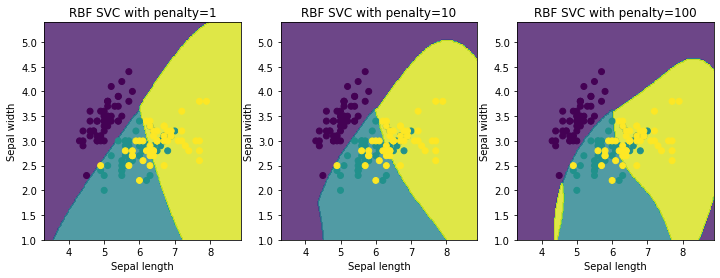

In [24]:
svc_penalty1 = svm.SVC(kernel='rbf', C=1).fit(x, y)
svc_penalty10 = svm.SVC(kernel='rbf', C=10).fit(x, y)
svc_penalty100 = svm.SVC(kernel='rbf', C=100).fit(x, y)

plt.rcParams["figure.figsize"] = (12,4)

plt.subplot(1, 3, 1)
z = svc_penalty1.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('RBF SVC with penalty=1')

plt.subplot(1, 3, 2)
z = svc_penalty10.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('RBF SVC with penalty=10')

plt.subplot(1, 3, 3)
z = svc_penalty100.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('RBF SVC with penalty=100')

plt.show()

### On-site cvičení

Nahrání modulů

In [3]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

Získání datové sady

In [4]:
data = load_wine()

Explorační analýza

In [5]:
X = data.data
y = data.target
y_names = data.target_names
a_names = data.feature_names
print(X)
print(y)
print(y_names)
print(a_names)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines',

Dělení dat na trénovací a testovací

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3., shuffle=True)
print(X_train)
print(y_train)

[[ 11.56   2.05   3.23 ...   0.93   3.69 465.  ]
 [ 12.     3.43   2.   ...   0.93   3.05 564.  ]
 [ 12.84   2.96   2.61 ...   0.89   2.15 590.  ]
 ...
 [ 12.37   1.17   1.92 ...   1.12   3.48 510.  ]
 [ 12.34   2.45   2.46 ...   0.8    3.38 438.  ]
 [ 12.69   1.53   2.26 ...   0.96   2.06 495.  ]]
[1 1 2 1 1 1 1 2 1 0 0 1 1 0 1 1 1 0 1 2 2 1 1 0 0 1 0 2 0 2 1 0 2 1 2 2 2
 0 1 0 0 0 0 2 0 0 2 0 0 2 0 2 1 1 1 1 1 0 1 0 2 2 0 0 1 1 1 0 2 2 0 1 1 1
 1 0 1 1 2 0 0 2 0 0 0 0 2 2 2 1 0 2 2 1 1 1 2 0 2 1 2 1 0 1 0 0 2 1 1 1 2
 2 1 0 2 1 1 1]


Tvorba klasifikátoru

In [7]:
svc = svm.SVC(kernel='poly', degree=1, C=1, gamma=1)

Trénování klasifikátoru

In [8]:
svc.fit(X_train, y_train)

SVC(C=1, degree=1, gamma=1, kernel='poly')

Měření přesnosti klasifikátoru

In [9]:
score = svc.score(X_test, y_test)
print(score)

0.9666666666666667


vizualizace tříd na základě dvou atributů

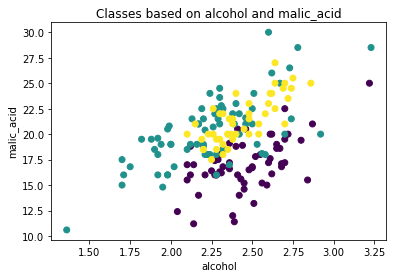

In [10]:
X = data.data
y = data.target
y_names = data.target_names
a_names = data.feature_names

plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel(a_names[0])
plt.ylabel(a_names[1])
plt.title(f'Classes based on {a_names[0]} and {a_names[1]}')
plt.show()